<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Расчет корреляции выручки с клиента, количества возвращенных займов и возраста с его скорингом

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('corr_data.xlsx')
data

,ReturnedAgrOrdNum,Score1,Score2,Amount,ProductType,app_PS_12mob,cl_PS_all,cl_LA_all,Age
0,3,0.3490,0.2474,2500,PDL,3700.0,22490.0,15000,28
1,2,0.4647,0.3810,3500,PDL,5432.0,5432.0,3500,54
2,52,0.2409,0.3120,20000,PDL,25600.0,79600.0,60000,53
3,2,0.5688,0.7272,1400,PDL,0.0,0.0,1400,24
4,1,0.5415,0.7386,1400,PDL,0.0,0.0,1400,42
...,...,...,...,...,...,...,...,...,...
174018,2,0.5917,0.5910,1600,PDL,1600.0,3020.0,7600,44
174019,5,0.4536,0.7456,9000,PDL,13338.0,36046.0,21800,34
174020,2,0.3562,0.5323,3500,PDL,8008.0,23671.0,16300,26
174021,1,0.4758,0.7175,1700,PDL,0.0,0.0,1700,36


In [3]:
data['Revenue'] = data['app_PS_12mob'] - data['Amount']

In [4]:
data.corr()

,ReturnedAgrOrdNum,Score1,Score2,Amount,app_PS_12mob,cl_PS_all,cl_LA_all,Age,Revenue
ReturnedAgrOrdNum,1.000000,-0.385875,-0.415448,0.460009,0.425776,0.385399,0.383310,0.073685,0.218798
Score1,-0.385875,1.000000,0.665475,-0.399818,-0.354708,-0.357871,-0.367058,0.009843,-0.163439
Score2,-0.415448,0.665475,1.000000,-0.219066,-0.241094,-0.287733,-0.279700,-0.041321,-0.170919
Amount,0.460009,-0.399818,-0.219066,1.000000,0.839685,0.546068,0.566741,0.129834,0.326119
app_PS_12mob,0.425776,-0.354708,-0.241094,0.839685,1.000000,0.604143,0.573861,0.137810,0.787220
cl_PS_all,0.385399,-0.357871,-0.287733,0.546068,0.604143,1.000000,0.980440,0.086668,0.431560
cl_LA_all,0.383310,-0.367058,-0.279700,0.566741,0.573861,0.980440,1.000000,0.076727,0.355373
Age,0.073685,0.009843,-0.041321,0.129834,0.137810,0.086668,0.076727,1.000000,0.092456
Revenue,0.218798,-0.163439,-0.170919,0.326119,0.787220,0.431560,0.355373,0.092456,1.000000


In [5]:
data_corr1 = data[['ReturnedAgrOrdNum', 'Score1', 'Revenue', 'Age']]

In [6]:
data_corr2 = data[['ReturnedAgrOrdNum', 'Score2', 'Revenue', 'Age']]

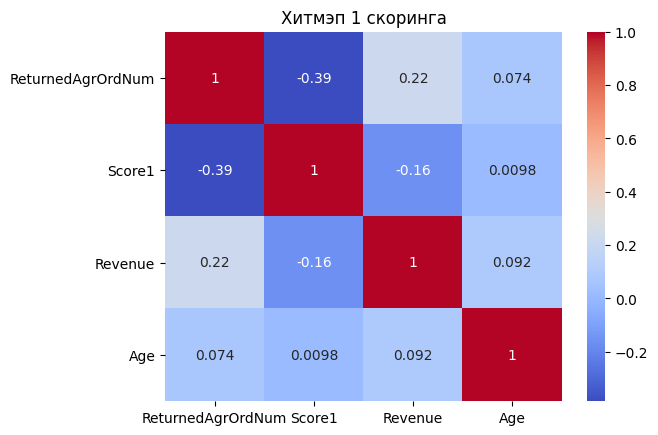

In [7]:
corr_matrix1 = data_corr1.corr()
    
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Хитмэп 1 скоринга')
plt.show()

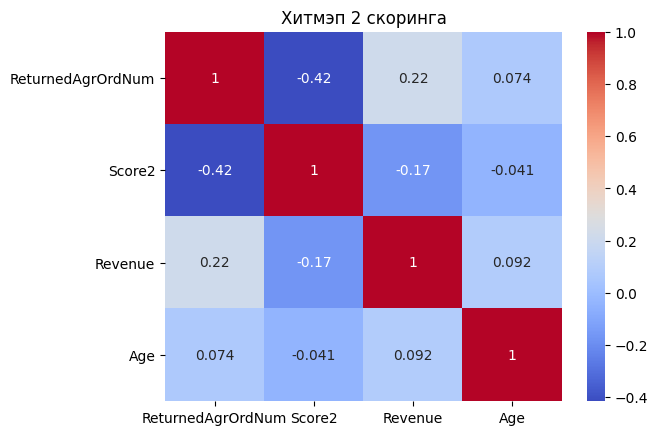

In [8]:
corr_matrix2 = data_corr2.corr()
    
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Хитмэп 2 скоринга')
plt.show()

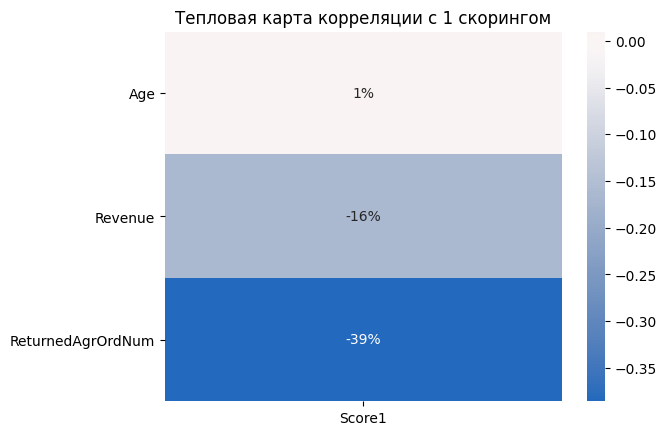

In [9]:
sns.heatmap(
    corr_matrix1.loc[:, ['Score1']].drop('Score1')
    .sort_values(by = 'Score1', ascending = False), 
    annot = True, fmt = '.0%', cmap = 'vlag', center = 0
)

plt.title('Тепловая карта корреляции с 1 скорингом')

plt.yticks(rotation=0)

plt.show()

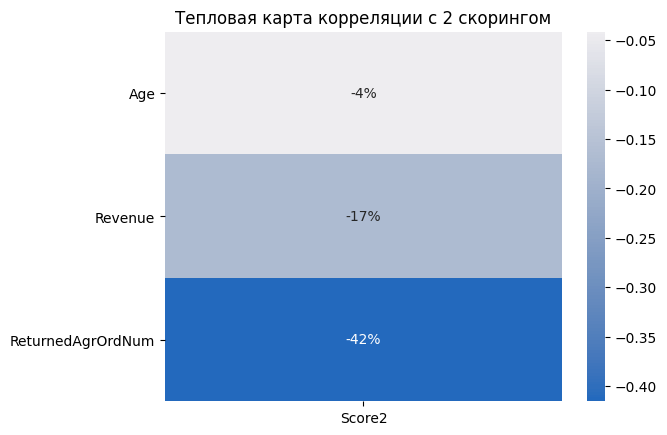

In [10]:
sns.heatmap(
    corr_matrix2.loc[:, ['Score2']].drop('Score2')
    .sort_values(by = 'Score2', ascending = False), 
    annot = True, fmt = '.0%', cmap = 'vlag', center = 0
)

plt.title('Тепловая карта корреляции с 2 скорингом')

plt.yticks(rotation=0)

plt.show()